# **Computer Vision - COVID19 Image Classification.  - By David Salako.**

<br>

## **Background, Goal, and Context.**

Provided are a training set and a test set of images of 3 classes. Each image has a filename that is its unique id. 
The dataset comprises 3 classes: 
* COVID-19, 
* Viral Pneumonia, and 
* Normal. 

The goal of the project is to create a classifier capable of determining the class of the X-ray image.

The context is:

* To differentiate an X-ray image of a normal person from that of an unhealthy one.
* The ability to do so effectively can mean better diagnosis.

<br>

## **Dataset:**

The project is inspired from a dataset from Kaggle.
Note: For project purposes, the dataset is modified according to the learning requirements.
You are provided with the following files:
* testimage.npy
* testLabels.csv
* trainimage.npy
* trainLabels.csv

The dataset (above 4 files) was downloaded from the Olympus platform of Great Learning.

<br>

## **Objective.**
To implement the techniques learned as a part of the course with the following learning outcomes:

* Pre-processing of image data.
* Visualization of images.
* Building CNN.
* Evaluate the Model.

<br>



# **Solution:**

## **Importing the libraries.**

In [ ]:
# mounting the drive to use the files in the notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import the needed libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import itertools
import seaborn as sns # For data visualization. 
import tensorflow as tf
import keras

from sklearn.metrics import confusion_matrix # Confusion Matrix.
from sklearn.model_selection import train_test_split  # Library for train, test, and split.

from keras.preprocessing import image # Image.
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D # NN Layers.
from keras.callbacks import EarlyStopping  # Regularzation method to prevent the overfitting.
from keras.callbacks import ModelCheckpoint # Callback for Storing model amd weights.
from keras.preprocessing.image import ImageDataGenerator # Image Augumentation Libraries.
from keras.callbacks import ReduceLROnPlateau # Learning Rate callback. 
from tensorflow.keras.optimizers import RMSprop,Adam # Optimiers for optimizing the model.
from tensorflow.keras.models import Sequential # Sequential API for sequential model. 
from tensorflow.keras.layers import Dense, Dropout, Flatten # Importing the different layers. 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Activation, Input, LeakyReLU,Activation
from tensorflow.keras.utils import to_categorical # To perform one-hot encoding.
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import losses, optimizers # Optimizers.
from tensorflow.keras.models import load_model # Loading the pre-trained model.



from IPython.display import display, HTML,Markdown

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

## **Load the Dataset.**

In [ ]:
nptrainImages = np.load('trainimage.npy') 
dftrainLabels = pd.read_csv("trainLabels.csv")

In [ ]:
nptestImages = np.load('testimage.npy')
dftestLabels =  pd.read_csv("testLabels.csv")

## **Shape of the Data.**

In [ ]:
# Shape of the training image dataset.

nptrainImages.shape

(251, 128, 128, 3)

**Observations:**

* Number images in the train dataset is 251.
* Each image is of 128x128 pixel and is a color image (RGB).

In [ ]:
# Sample of the training image dataset.

nptrainImages[0]

array([[[ 16,  16,  16],
        [ 31,  31,  31],
        [ 39,  39,  39],
        ...,
        [ 27,  27,  27],
        [ 51,  51,  51],
        [ 83,  83,  83]],

       [[ 23,  23,  23],
        [ 21,  21,  21],
        [ 41,  41,  41],
        ...,
        [244, 244, 244],
        [236, 236, 236],
        [ 67,  67,  67]],

       [[ 18,  18,  18],
        [ 31,  31,  31],
        [ 37,  37,  37],
        ...,
        [ 80,  80,  80],
        [ 69,  69,  69],
        [ 58,  58,  58]],

       ...,

       [[  5,   5,   5],
        [  4,   4,   4],
        [  4,   4,   4],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  4,   4,   4]],

       [[  1,   1,   1],
        [  2,   2,   2],
        [  2,   2,   2],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  4,   4,   4],
        [  2,   2,   2],
        [253, 253, 253],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [ ]:
# Shape of the training labels dataset.
 
dftrainLabels.shape

(251, 1)

**Observations:**

* Number of training labels = 251.
* Labels size is matching with image data size (251).

In [ ]:
# Shape of the test image dataset.

nptestImages.shape

(66, 128, 128, 3)

**Observations:**

* Number images in the test dataset is 66.
* Each image is of 128x128 pixel and is a color image (RGB).

In [ ]:
# Sample of the test image dataset.

nptestImages[0]

array([[[ 86,  86,  86],
        [109, 109, 109],
        [104, 104, 104],
        ...,
        [ 36,  36,  36],
        [ 33,  33,  33],
        [ 28,  28,  28]],

       [[ 99,  99,  99],
        [ 96,  96,  96],
        [116, 116, 116],
        ...,
        [ 31,  31,  31],
        [ 29,  29,  29],
        [ 28,  28,  28]],

       [[105, 105, 105],
        [105, 105, 105],
        [117, 117, 117],
        ...,
        [ 32,  32,  32],
        [ 29,  29,  29],
        [ 27,  27,  27]],

       ...,

       [[ 56,  56,  56],
        [  8,   8,   8],
        [  5,   5,   5],
        ...,
        [ 16,  16,  16],
        [ 17,  17,  17],
        [ 57,  57,  57]],

       [[  9,   9,   9],
        [  7,   7,   7],
        [  4,   4,   4],
        ...,
        [ 17,  17,  17],
        [ 17,  17,  17],
        [ 17,  17,  17]],

       [[  9,   9,   9],
        [  8,   8,   8],
        [  4,   4,   4],
        ...,
        [ 16,  16,  16],
        [ 17,  17,  17],
        [ 17,  17,  17]]

In [ ]:
# Shape of the test labels dataset.
 
dftestLabels.shape

(66, 1)

## **Label Data Exploration.**

In [ ]:
# X-ray labels random sample.

dftrainLabels.sample(n=10,random_state=1)

,Label
67,Viral Pneumonia
250,Normal
230,Normal
161,Covid
91,Covid
224,Normal
58,Viral Pneumonia
234,Normal
180,Covid
4,Viral Pneumonia


In [ ]:
# Number of X-ray images for each each type of label.

lbl_val_counts= dftrainLabels.value_counts().to_frame('Count').reset_index()
lbl_val_counts

,Label,Count
0,Covid,111
1,Viral Pneumonia,70
2,Normal,70


**Observations:**

* There are 3 classifications of X-ray images in this dataset: Covid, Viral Pneumonia, and Normal.
* The largest group at a count of 111 is the Covid X-ray images while the Viral Pneumonia and Normal are equal counts of 70 respectively.

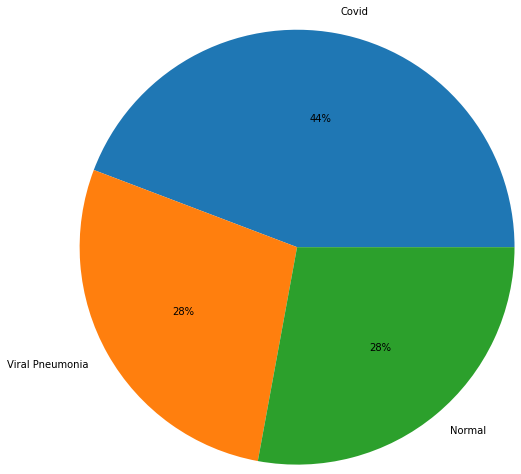

In [ ]:
# Visualizing the data distribution with a pie chart.

plt.pie(lbl_val_counts['Count'], labels=lbl_val_counts['Label'], autopct='%1.0f%%',radius=2.5)
plt.show()

**Observations:**

* Slight imbalance in the data with more COVID19 images.
* We can explore upsampling/image augmentation options to possibly address this imbalance.

In [ ]:
dftrainLabels.isna().sum().to_frame('NaCount')

,NaCount
Label,0


**Observation:**

* All the X-ray images have labels.

## **Image Data Exploration.**

### **Image Dimensions**

**Are all images the same size?**

In [ ]:
# Examine the  X-ray image dimensions. Collect all images which are different from the dimensions 128x128x3.

img_dim_data=[]
for i in range(nptrainImages.shape[0]): 
  if(str(nptrainImages[i].shape) != '(128, 128, 3)'):
    #print(str(i)+lblData.iloc[0]['Label']+str(imgData[i].shape))
    img_dim_data.append([i,dftrainLabels.iloc[0]['Label'],nptrainImages[i].shape])   

dimension_df = pd.DataFrame(data=img_dim_data,columns=['img_num','Diagnosis','dimension'])    
dimension_df.head()

,img_num,Diagnosis,dimension


* All images have the same dimensions 128x128x3.
* Images do not need to be resized.

## **Visualize Images.**

* Visualize the sample images (6) per X-ray diagnosis category to observe the similarity with-in the same category.

In [ ]:
# Sample X-ray diagnosis index for data visualization.

row_data=[]
for c in lbl_val_counts['Label'].sort_values():
    row_data.append([c,dftrainLabels[dftrainLabels['Label']==c].head(6).index.values])
    sample_xray_index_df=pd.DataFrame(data=row_data,columns=['Diagnosis','Sample Indexes']).sort_values(by='Diagnosis')   
sample_xray_index_df

,Diagnosis,Sample Indexes
0,Covid,"[70, 71, 72, 73, 74, 75]"
1,Normal,"[181, 182, 183, 184, 185, 186]"
2,Viral Pneumonia,"[0, 1, 2, 3, 4, 5]"


**Observation:**

* The sample indexes will be used to print the sample images for visualization.

### **Visualize the Gray Scale X-ray Images.**

In [ ]:
# Helper function to print sample images.

def print_sample_images(imageData):
  fig = plt.figure(figsize = (25,25))
  i=0
  for c in lbl_val_counts['Label'].sort_values():
    indexVals = sample_xray_index_df[sample_xray_index_df['Diagnosis'] == c]['Sample Indexes'].values
    
    for imgIndx in indexVals.all():
      fp=imageData[imgIndx]
      label=c
      #print(i)
      ax = fig.add_subplot(12, 6, i+1)
      i=i+1
    
      # to plot without rescaling, remove target_size
      #fn = image.load_img(fp,color_mode='rgb')
      plt.imshow(fp,cmap='gray')
      plt.title(label)
      plt.axis('off')
      plt.tight_layout(w_pad=-25,h_pad=1)
  plt.show()

In [ ]:
# Converting color images to gray scale.

imgData_gray=np.empty(shape=(nptrainImages.shape[0],128,128))
for i in range(nptrainImages.shape[0]):
  imgData_gray[i]=cv2.cvtColor(nptrainImages[i], cv2.COLOR_BGR2GRAY)

In [ ]:
imgData_gray.shape

(251, 128, 128)

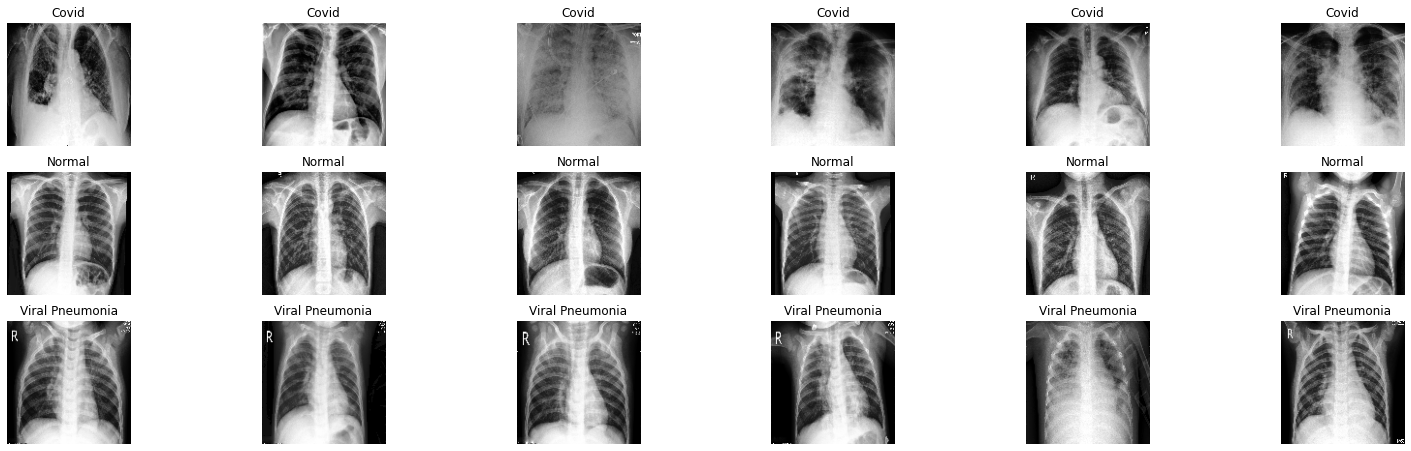

In [ ]:
# Print a sample of the gray scale images.

print_sample_images(imgData_gray)

**Observations:**

* The X-ray images were already in black and white, therefore the grayscaling may remove some of the subtle differences present in the 3 layer RGB black and white images.

### **Visualize the Black and White RGB X-ray Images.**

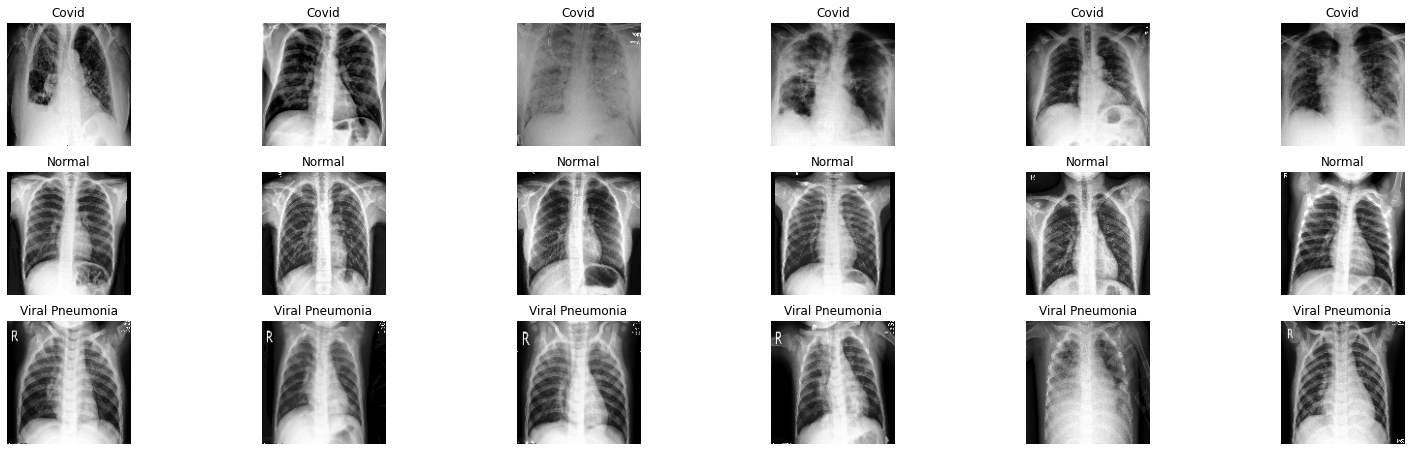

In [ ]:
print_sample_images(nptrainImages)

## **Mean per each Diagnosis.**

* Finding the mean of all the X-ray images per each category/label will help us to find the contrast difference which can be used for further analysis.

In [ ]:
img_dict={}
for c in lbl_val_counts['Label']:
  img_dict[c]=[]
for i in range(dftrainLabels.shape[0]):
  label=dftrainLabels.iloc[i]['Label'] 
  img_dict[label].append(nptrainImages[i])

In [ ]:
# Helper function to print Avg/mean of an image per category/Label.

def print_images_mean():
  fig = plt.figure(figsize = (45,45))
  i=0
  for c in lbl_val_counts['Label'].sort_values():
    mean_img = np.mean(img_dict[c],axis =0)
    mean_img = mean_img/np.amax(mean_img)
    # reshape it back to a matrix
    mean_img = mean_img.reshape((128,128,3))
    #print(i)
    ax = fig.add_subplot(12, 3, i+1)
    i=i+1
  
    # to plot without rescaling, remove target_size
    #fn = image.load_img(fp,color_mode='rgb')
    plt.imshow(mean_img)
    plt.title(f'Average {c}')
    plt.axis('off')
    plt.tight_layout(w_pad=-250,h_pad=5)
  plt.show()

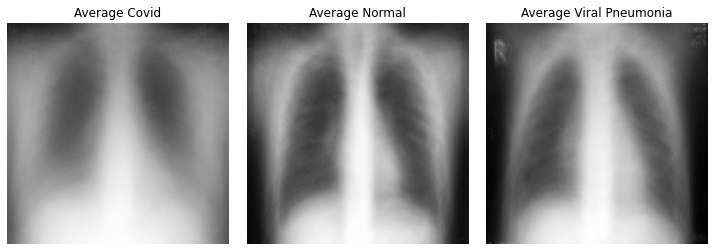

In [ ]:
print_images_mean()

**Observations:**
* There is a difference in the average/mean of the images per class label. 
* Covid19 is the most blurred while Normal is the clearest.
* Viral pneumonia falls inbetween the other two diagnoses in terms of average/mean image clarity.

## **Data Pre-Processing.**

### **No Gaussian Blurring et al.**

In [ ]:
imgData_original=np.copy(nptrainImages,subok=True)

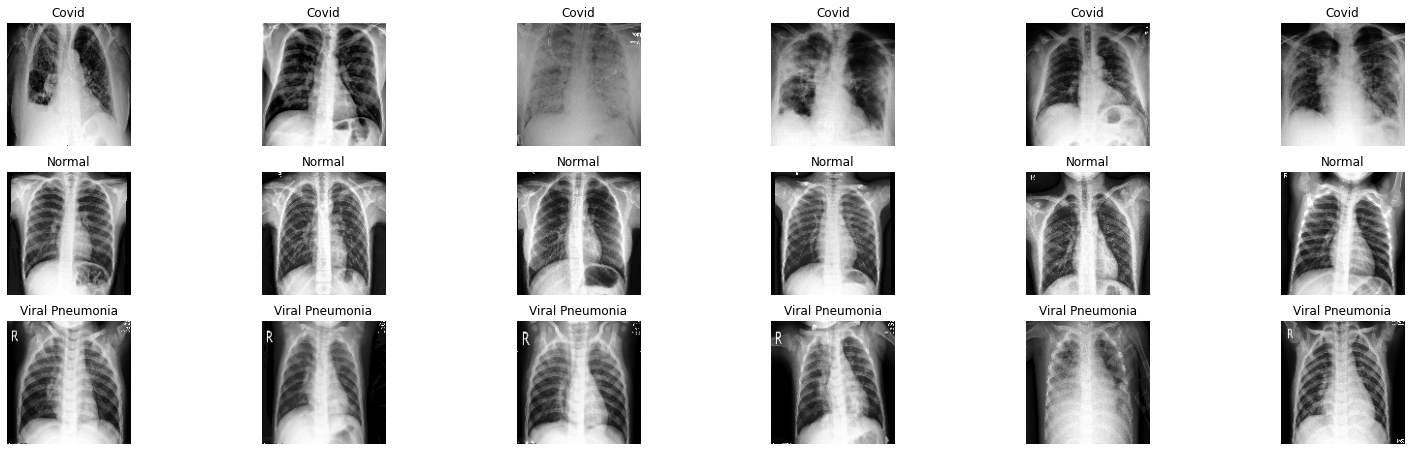

In [ ]:
print_sample_images(imgData_original)

**Observation:**

* Above images show the original images in the dataset without any filters.

### **Gaussian Blurring.**

* Image blurring is achieved by convolving the image with a low-pass filter kernel useful for removing noise.

* Using 5x5 Gaussian blurring kernal to reduce image noise and detail as a part of pre-processing.

In [ ]:
imgData_blurred=np.copy(nptrainImages,subok=True)
for i in range(nptrainImages.shape[0]):
  cv2.GaussianBlur(nptrainImages[i], (5, 5), 0)

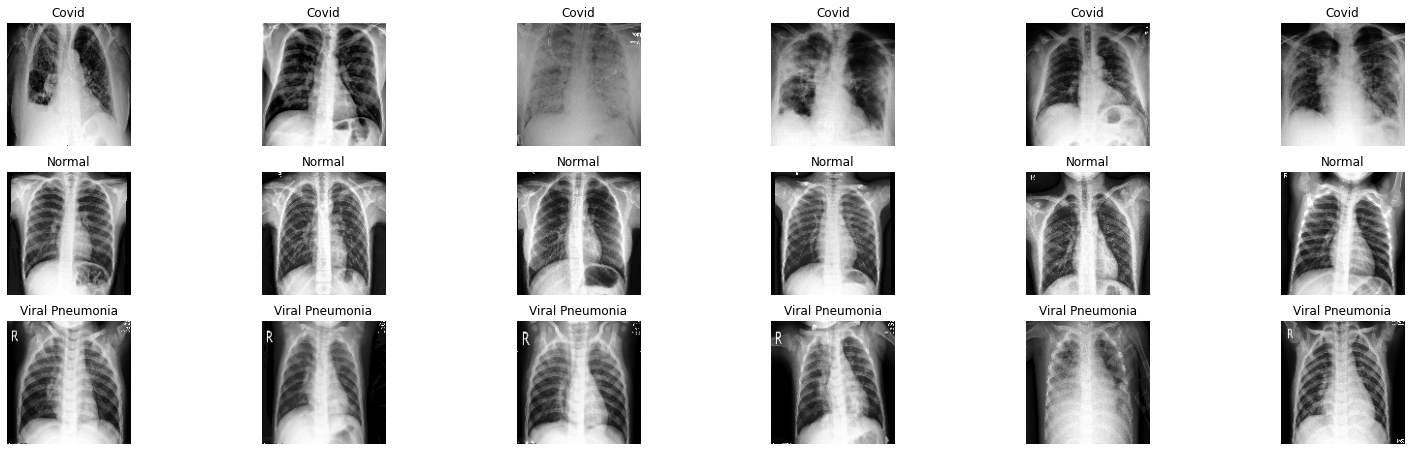

In [ ]:
print_sample_images(imgData_blurred)

**Observation:**

* Above images show that after applying gussian blurr kernal on the images there is a little reduction in image detail.

### **Normalization.**

* Normalize tensors to 0 - 1 scale. The X-ray Image Data needs to be normalized to 0-1 by diving the values by 255.

In [ ]:
# Normalizing the pixel values.  

# Original dataset (no Gaussian Blurring et al.).

imgData_original_normalized=np.copy(imgData_original,subok=True)
imgData_original_normalized=imgData_original/255.0


# Blurred dataset.

imgData_blurred_normalized=np.copy(imgData_blurred,subok=True)
imgData_blurred_normalized=imgData_blurred_normalized/255.0

In [ ]:
# Image reshaping original dataset with no Gaussian Blurring et al..

imgData_original_normalized=imgData_original_normalized.reshape(-1,128,128,3)

# Sample image data after normalization (original dataset with no Gaussian Blurring et al.).

imgData_original_normalized[0]

array([[[0.0627451 , 0.0627451 , 0.0627451 ],
        [0.12156863, 0.12156863, 0.12156863],
        [0.15294118, 0.15294118, 0.15294118],
        ...,
        [0.10588235, 0.10588235, 0.10588235],
        [0.2       , 0.2       , 0.2       ],
        [0.3254902 , 0.3254902 , 0.3254902 ]],

       [[0.09019608, 0.09019608, 0.09019608],
        [0.08235294, 0.08235294, 0.08235294],
        [0.16078431, 0.16078431, 0.16078431],
        ...,
        [0.95686275, 0.95686275, 0.95686275],
        [0.9254902 , 0.9254902 , 0.9254902 ],
        [0.2627451 , 0.2627451 , 0.2627451 ]],

       [[0.07058824, 0.07058824, 0.07058824],
        [0.12156863, 0.12156863, 0.12156863],
        [0.14509804, 0.14509804, 0.14509804],
        ...,
        [0.31372549, 0.31372549, 0.31372549],
        [0.27058824, 0.27058824, 0.27058824],
        [0.22745098, 0.22745098, 0.22745098]],

       ...,

       [[0.01960784, 0.01960784, 0.01960784],
        [0.01568627, 0.01568627, 0.01568627],
        [0.01568627, 0

In [ ]:
# Image reshaping blurred dataset.

imgData_blurred_normalized=imgData_blurred_normalized.reshape(-1,128,128,3)

# Sample image of blurred data after normalization

imgData_blurred_normalized[0]

array([[[0.0627451 , 0.0627451 , 0.0627451 ],
        [0.12156863, 0.12156863, 0.12156863],
        [0.15294118, 0.15294118, 0.15294118],
        ...,
        [0.10588235, 0.10588235, 0.10588235],
        [0.2       , 0.2       , 0.2       ],
        [0.3254902 , 0.3254902 , 0.3254902 ]],

       [[0.09019608, 0.09019608, 0.09019608],
        [0.08235294, 0.08235294, 0.08235294],
        [0.16078431, 0.16078431, 0.16078431],
        ...,
        [0.95686275, 0.95686275, 0.95686275],
        [0.9254902 , 0.9254902 , 0.9254902 ],
        [0.2627451 , 0.2627451 , 0.2627451 ]],

       [[0.07058824, 0.07058824, 0.07058824],
        [0.12156863, 0.12156863, 0.12156863],
        [0.14509804, 0.14509804, 0.14509804],
        ...,
        [0.31372549, 0.31372549, 0.31372549],
        [0.27058824, 0.27058824, 0.27058824],
        [0.22745098, 0.22745098, 0.22745098]],

       ...,

       [[0.01960784, 0.01960784, 0.01960784],
        [0.01568627, 0.01568627, 0.01568627],
        [0.01568627, 0

In [ ]:
# Imagedata shape no blurring and normalized.

imgData_original_normalized.shape

(251, 128, 128, 3)

In [ ]:
# Imagedata shape after blurred and normalized.

imgData_blurred_normalized.shape

(251, 128, 128, 3)

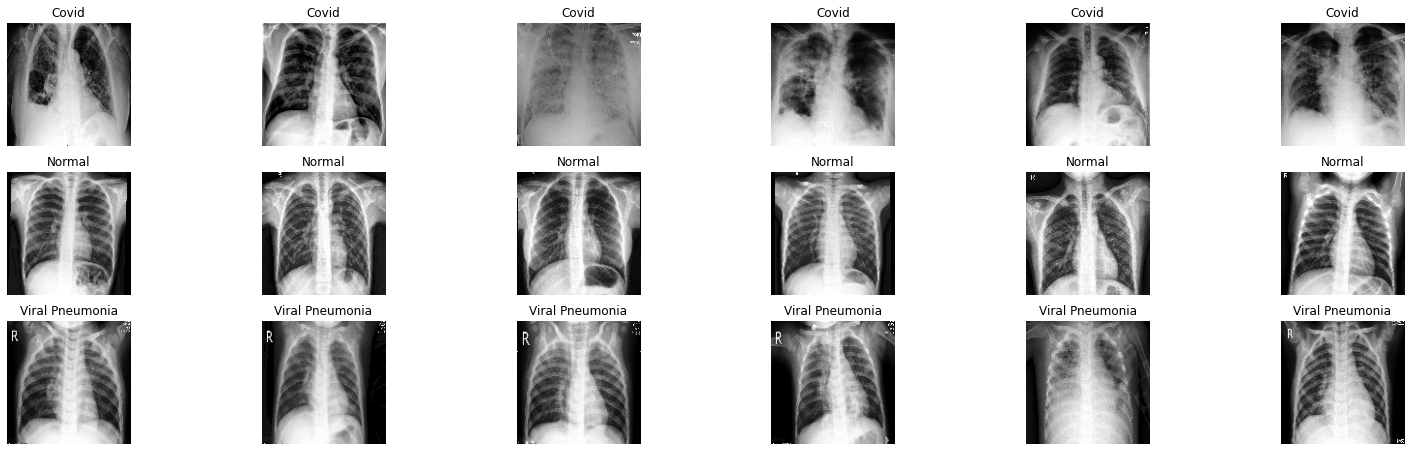

In [ ]:
# Printing sample images no blurring and normalization pre processes.

print_sample_images(imgData_original_normalized)

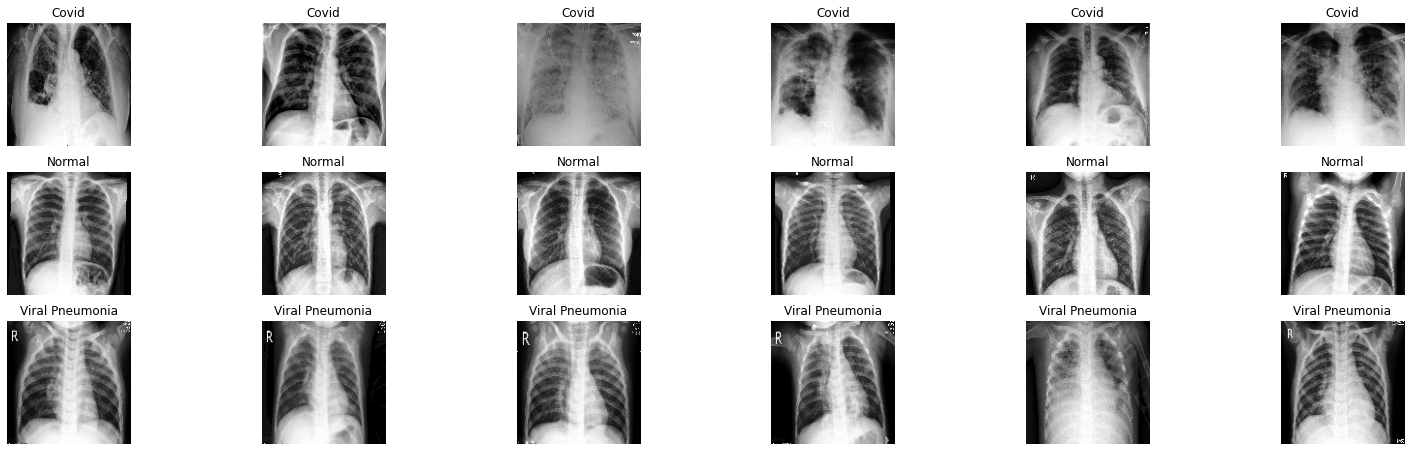

In [ ]:
# Printing sample images after blur and normalization pre processes.

print_sample_images(imgData_blurred_normalized)

**Observations:**

* Since the backgrounds of the blurred images are clear solid black and not filled with lots of background objects there is no need to apply further masking pre-processing technoques to the X-ray images.

* There is the letter "R" that appears in the foreground of some of the images but we will ignore those for the time being.

## **Data Preparation.**

### **Labels to one-hot vectors.**

* Converting Labels into numbers.
* The image labels are strings and these are hard to process. So we will convert these labels into a binary classification.
* The classification can be represented by an array of 3 numbers which will follow the condition:
    * 0 if the diagnosis is not detected.
    * 1 if the diagnosis is detected.


In [ ]:
from sklearn.preprocessing import LabelBinarizer
enc_data=[]
enc = LabelBinarizer()
y_encoded = enc.fit_transform(dftrainLabels['Label']) # For training.
y_encoded[0]

array([0, 0, 1])

In [ ]:
y_encoded_test = enc.fit_transform(dftestLabels['Label']) # For test.
y_encoded_test[0]

array([0, 0, 1])

* There is an alternate way to convert the target variable to one-hot Convert String categorical to numeric.
* Use tensorflow.keras.utils.to_categorical to convert to binary array.

### **Print the Labels.**

* Creating a dataframe to print the image label, encoded value, and class label that the model will emit.

In [ ]:
# Get the unique label entries from dftrainLabels dataset.

lblData_no_dups= dftrainLabels.drop_duplicates()
lblData_no_dups=lblData_no_dups.reset_index().rename(columns={'index':'row_id'})

# Add encoded value from y_encoded based on row_id

lblData_no_dups['Encoded_val']=[y_encoded[x] for x in lblData_no_dups['row_id']]

# Add class label from y_encoded based on row_id

lblData_no_dups['Class_Label']=[np.argmax(y_encoded[x]) for x in lblData_no_dups['row_id']]
lblData_no_dups.drop(columns=['row_id'],inplace=True)

* Labels , Encoded values and respective class labels are shown below.

In [ ]:
lblData_no_dups.sort_values(by='Class_Label',ascending=True)

,Label,Encoded_val,Class_Label
1,Covid,"[1, 0, 0]",0
2,Normal,"[0, 1, 0]",1
0,Viral Pneumonia,"[0, 0, 1]",2


### **Split Original Unblurred Data (Train, Test, and Validation).**

* Dataset already has a training dataset and a testing dataset.
* We will split test data into test and validation with test_size = 0.5.

In [ ]:
X_train_original = imgData_original_normalized
y_train_original = y_encoded

print(X_train_original.shape)
print(y_train_original.shape)

(251, 128, 128, 3)
(251, 3)


In [ ]:
X_test_original, X_val_original, y_test_original, y_val_original = train_test_split(nptestImages,y_encoded_test, test_size = 0.5, random_state=2)
print(X_test_original.shape)
print(X_val_original.shape)
print(y_test_original.shape)
print(y_val_original.shape)

(33, 128, 128, 3)
(33, 128, 128, 3)
(33, 3)
(33, 3)


### **Split Blurred Data (Train, Test, and Validation).**

* Dataset already has a training dataset and a testing dataset.
* We will split test data into test and validation with test_size = 0.5.

In [ ]:
X_train_blurred = imgData_blurred_normalized
y_train_blurred = y_encoded

print(X_train_blurred.shape)
print(y_train_blurred.shape)

(251, 128, 128, 3)
(251, 3)


In [ ]:
X_test_blurred, X_val_blurred, y_test_blurred, y_val_blurred = train_test_split(nptestImages,y_encoded_test, test_size = 0.5, random_state=2)
print(X_test_blurred.shape)
print(X_val_blurred.shape)
print(y_test_blurred.shape)
print(y_val_blurred.shape)

(33, 128, 128, 3)
(33, 128, 128, 3)
(33, 3)
(33, 3)


### **Check Data Compatibility with Keras.**

* Image data and Label data are compatible with Keras.

## **Model Building.**

* Create/train four models.
    * 3 models with the Blurred and Normalized Image dataset.
    * 1 model with the original dataset.

* For all 4 models:
    * EarlyStopping and Model checkpoint call backs will be used.
    * Metrics will be plotted (Loss, Accuracy, Precision and Recall).
    * Display confusion matrix for Test and Validation data.
    * Misclassification metrics are tabulated including predicted and actual labels with sample images.
    * Perfomance metrics (Train/Test/Validation) for each model will be displayed in a single dataframe for comparision.

* Models Details
    * Model1: Basic Model 
      * 3 Conv/Maxpool layers with 16,32,64 filters and 5x5, 3x3, and 3x3 kernel sizes.
      * 2 dense layers with 512 and 3 (output layer) neurons.

    * Model2: Model with more layers and Dropout
      * 5 Conv/MaxPool/Dropout layers with different filter and kernel sizes.
      * Maxpool layer has strides and dropout layers are added compre to model1.
          * 2 dense layers with 1024 and 3 (output layer) neurons.

    * Model3: Model with Dropout, DataAugumentaion, LRReduction Callbacks to address the overfitting.
      * 5 Conv/MaxPool/Dropout layers with different filter and kernel sizes just like model2.
      * Maxpool layer has strides and dropout layers are added to model1 similar to Model2.
          * 2 dense layers with 1024 and 3 (output layer) neurons similar to Model2.
          * Filter, Kernal sizes are fine tuned and compared with model2.
    * Model4: Basic Model (Original Dataset - No Gaussian Blurring et al.).
        * 3 Conv/Maxpool layers with 16,32,64 filters and 5x5, 3x3, and 3x3 kernel sizes.
        * 2 dense layers with 512 and 3 (output layer) neurons.


### **Helper Functions**

In [ ]:
# Prints the confusion matrix.

def print_confusion_matrix(model,X_values,y_values,title_val):
  # Predict the values from the validation dataset.
  Y_pred = model.predict(X_values)
  # Convert predictions classes to one hot vectors.
  Y_pred_classes = np.argmax(Y_pred,axis = 1) 
  # Convert validation observations to one hot vectors.
  Y_true = np.argmax(y_values,axis = 1) 
  # Compute the confusion matrix.
  confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
  # Plot the confusion matrix.
  plot_confusion_matrix(confusion_mtx, title=title_val, classes = range(3))

In [ ]:
# Plots the evaluation metrics.

def plot_metrics(history):
  # List of metrics to be plotted.
  metrics = ['loss', 'accuracy', 'precision', 'recall']
  fig = plt.figure(figsize = (10,10))
  # For every metric in the above list plot diagram.
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], label='Train')
    #Validation metric plot
    plt.plot(history.epoch, history.history['val_'+metric],
              label='Val')
    plt.title('model '+metric)
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])
    plt.tight_layout()
    plt.legend()

In [ ]:
# This will collect misclassification info (like predicted and actual labels) in a dataframe and prints.
# Sample imaged for the misclassifications will be shown.

def print_visualize_misclassifications(model_val,X_test_value,y_test_value):
  display_mainHeading("Model Misclassifications")
  # Predicted label.
  predicted_test = np.argmax(model_val.predict(X_test_value),axis = 1)  
  # Index of predicted label.
  wrong_pred_indices=np.where(predicted_test != np.argmax(y_test_value,axis=1))[0]  
  # Loop through all misclassified row indexes and preparing data to add to dataframe.
  wrong_pred_data=[]
  for i in range(wrong_pred_indices.size):
    wrong_row_indx=wrong_pred_indices[i]
    wrong_pred_data.append([wrong_row_indx,enc.classes_[predicted_test[wrong_row_indx]]+'('+str(predicted_test[wrong_row_indx])+')',enc.classes_[np.argmax(y_test_value[wrong_row_indx])]+'('+str(np.argmax(y_test_value[wrong_row_indx]))+')'])
  # Creating the misclassification dataframe.
  wrong_pred_df = pd.DataFrame(data=wrong_pred_data,columns=['RowNo','Predicted Diagnosis (Label)','Actual Diagnosis (Label)'])    
  misclas_str='Total Number of misclassifications with this model = ' +str(wrong_pred_df.shape[0])+' . Following are some samples...'
  display (Markdown('<font color="orange">'+misclas_str+'</font>'))
  # Display('Total Number of misclassifications with this model =' +str(wrong_pred_df.shape[0])).
  display(wrong_pred_df.head(10))

  f, axarr = plt.subplots(1, 2, figsize=(10, 10)) 

  cnt = (wrong_pred_df.shape[0] - 1)

  # Shows the image of first sample from misclassification dataframe built.
  display (Markdown('<BR>'))
  display_subHeading("Model Misclassification Samples")
  axarr[0].imshow(X_test_value[wrong_pred_df['RowNo'][0]])
  axarr[0].set_title("Predicted = "+wrong_pred_df['Predicted Diagnosis (Label)'][0]+"\nActual = "+wrong_pred_df['Actual Diagnosis (Label)'][0])
  #plt.imshow(X_test_value[wrong_pred_df['RowNo'][0]])
  #plt.show()
  #print("Predicted class for RowNo "+str(wrong_pred_df['RowNo'][0])+" : {}".format(wrong_pred_df['Predicted Seedling(Label)'][0]))
  #print("Actual class  for RowNo "+str(wrong_pred_df['RowNo'][0])+" : {}".format(wrong_pred_df['Actual Seedling(Label)'][0]))
  
  #Shows the image of fifth sample from misclassification dataframe built 
  #display (Markdown('<BR>'))
  #plt.imshow(X_test_value[wrong_pred_df['RowNo'][5]])
  #print("Predicted class for RowNo "+str(wrong_pred_df['RowNo'][5])+" : {}".format(wrong_pred_df['Predicted Seedling(Label)'][5]))
  #print("Actual class  for Row No "+str(wrong_pred_df['RowNo'][5])+" : {}".format(wrong_pred_df['Actual Seedling(Label)'][5]))
  axarr[1].imshow(X_test_value[wrong_pred_df['RowNo'][cnt]])
  axarr[1].set_title("Predicted = "+wrong_pred_df['Predicted Diagnosis (Label)'][cnt]+"\nActual = "+wrong_pred_df['Actual Diagnosis (Label)'][cnt])
  plt.show()
  

  return wrong_pred_df

In [ ]:
# Prepare empty performance metrics dataframe to capture for all models.

columns_of_interest=['Classifier Mdl Name','Trn Accuracy','Tst Accuracy','Val Accuracy','Trn Precision','Tst Precision','Val Precision','Trn Recall','Tst Recall','Val Recall']
model_perf_df = pd.DataFrame(data=[],columns=['Classifier Mdl Name','Trn Accuracy','Tst Accuracy','Val Accuracy','Trn Precision','Tst Precision','Val Precision','Trn Recall','Tst Recall','Val Recall','Mdl Config'])

In [ ]:
# Plot the confusion matrix.

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.subplots(figsize=(22,7)) # Set the size of the plot.
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Print all performace metrics and capture them in a dataframe for all models comparision.

def evaluate_and_store_perf_metrics(model,model_name,model_description,X_train_value, y_train_value,X_validation, y_validation,X_test_value, y_test_value):
  #model_perf_df = pd.DataFrame(data=[],columns=['Classifier Mdl Name','Trn Accuracy','Tst Accuracy','Trn Precision','Tst Precision','Trn Recall','Tst Recall','Mdl Config']) 
  display_mainHeading("Model Evaluation Train/Test/Validation Scores")
  # Validation data metrics.
  val_scores = model.evaluate(X_validation, y_validation, verbose=0, batch_size = 64)
  # Train data metrics.
  train_scores = model.evaluate(X_train_value, y_train_value, verbose=0, batch_size = 64)
  # Test data metrics.
  test_scores = model.evaluate(X_test_value, y_test_value, verbose=0, batch_size = 64)
  # Append all train/test/valdation scores to dataframe.
  model_perf_df.loc[len(model_perf_df.index)] = [
        model_name,
        train_scores[1],       
        test_scores[1],
        val_scores[1],
        train_scores[2],
        test_scores[2],
        val_scores[2],
        train_scores[3],
        test_scores[3],
        val_scores[3],
        model.get_config()]
  # Display(model_perf_df).
  return model_perf_df

In [ ]:
# Display helper for the start and end of the model run.

def display_mainHeading(string):
    display (Markdown('<BR><center> <strong><font color="blue"><----------------------------------'+string+'-------------------------------------></font></strong></center><BR>'))

#Display helper for the sub headings within the model run.

def display_subHeading(string):
    display (Markdown('<center> <strong><font color="green"><-------------'+string+'-------------></font></strong></center>'))

## **Model1 - Basic Model.**

* 3 Conv/Maxpool layers with 16,32,64 filters and 5x5, 3x3 and 3x3 kernel sizes.
* 3 dense layers with 512 and 3 (output layer) neurons.

### **Build and Train Model.**

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('model1_best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model1 = Sequential()
# Conv/Maxpool.
model1.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,3)))
model1.add(MaxPool2D(pool_size=(2,2)))
# Conv/Maxpool.
model1.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
# Conv/Maxpool.
model1.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
# Flattening.
model1.add(Flatten())
# Dense layer.
model1.add(Dense(512, activation = "relu"))

model1.add(Dense(3, activation = "softmax"))
# Compile the model.
model1.compile(optimizer = "rmsprop" , loss = "categorical_crossentropy", metrics=["accuracy","Recall","Precision"])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 16)      1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0

In [ ]:
# Train the model.

history1=model1.fit(X_train_blurred, 
          y_train_blurred,  # It expects integers due to the sparse_categorical_crossentropy loss function.
          epochs=50, # Number of iterations over the entire dataset to train on.
          batch_size=64,validation_data = (X_val_blurred,y_val_blurred),callbacks=[es, mc],use_multiprocessing=True) # Number of samples per gradient update for training.

Epoch 1/50
4/4 [==============================] - 6s 1s/step - loss: 6.5669 - accuracy: 0.4223 - recall: 0.2988 - precision: 0.4870 - val_loss: 36.2221 - val_accuracy: 0.4242 - val_recall: 0.4242 - val_precision: 0.4242

Epoch 00001: val_accuracy improved from -inf to 0.42424, saving model to model1_best_model.h5
Epoch 2/50
4/4 [==============================] - 5s 1s/step - loss: 0.9318 - accuracy: 0.6016 - recall: 0.3386 - precision: 0.6538 - val_loss: 27.3527 - val_accuracy: 0.7273 - val_recall: 0.7273 - val_precision: 0.7273

Epoch 00002: val_accuracy improved from 0.42424 to 0.72727, saving model to model1_best_model.h5
Epoch 3/50
4/4 [==============================] - 5s 1s/step - loss: 0.7835 - accuracy: 0.7052 - recall: 0.6215 - precision: 0.7059 - val_loss: 193.4232 - val_accuracy: 0.3636 - val_recall: 0.3636 - val_precision: 0.3636

Epoch 00003: val_accuracy did not improve from 0.72727
Epoch 4/50
4/4 [==============================] - 5s 1s/step - loss: 0.7171 - accuracy: 0.

### **Plot Train/Validation Metrics.**

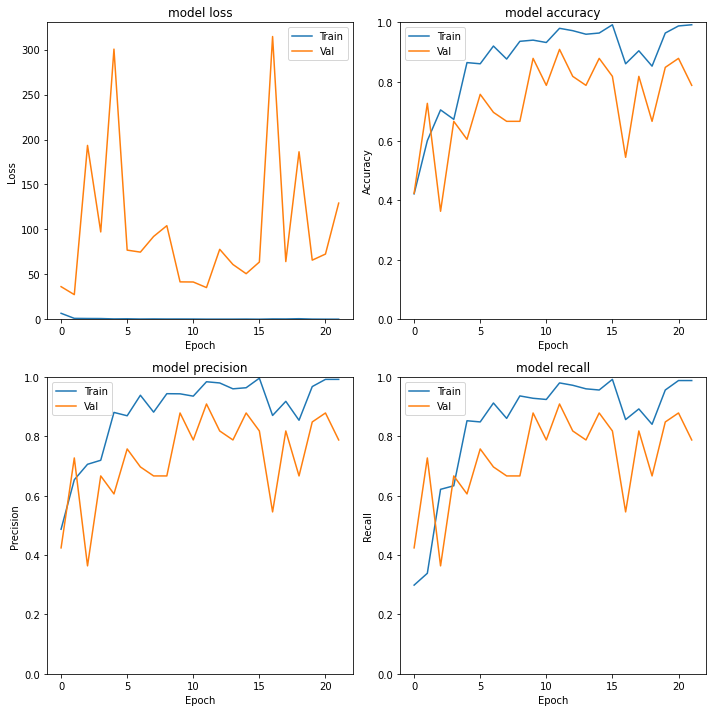

In [ ]:
plot_metrics(history1)

### **Plot Confusion Matrix.**

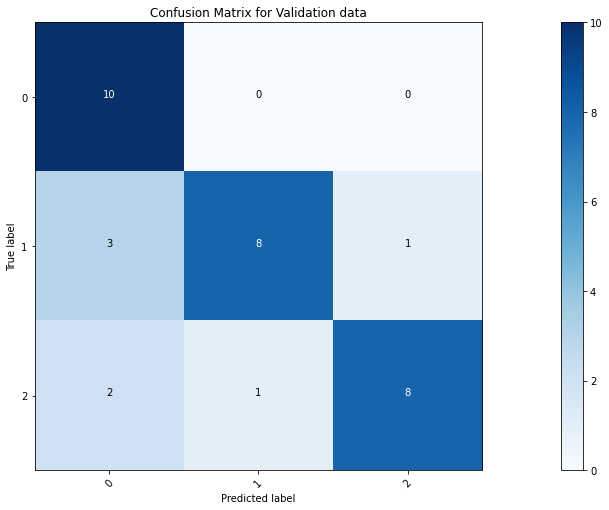

In [ ]:
print_confusion_matrix(model1,X_val_blurred,y_val_blurred,"Confusion Matrix for Validation data")

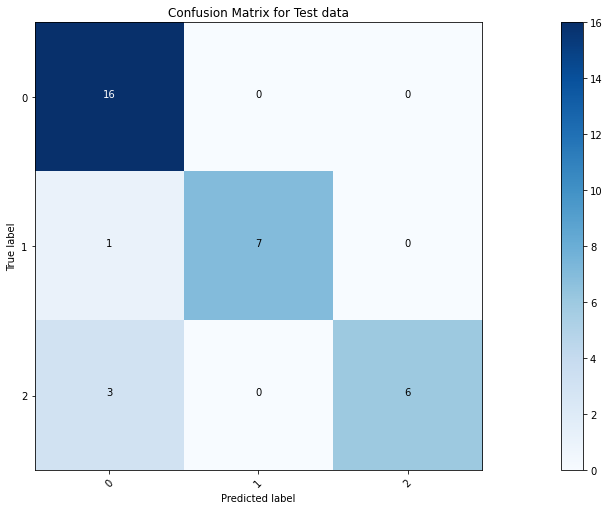

In [ ]:
print_confusion_matrix(model1,X_test_blurred,y_test_blurred,'Confusion Matrix for Test data')

### **Print and Visualize Misclassifications.**

<BR><center> <strong><font color="blue"><----------------------------------Model Misclassifications-------------------------------------></font></strong></center><BR>

<font color="orange">Total Number of misclassifications with this model = 4 . Following are some samples...</font>

,RowNo,Predicted Diagnosis (Label),Actual Diagnosis (Label)
0,4,Covid(0),Viral Pneumonia(2)
1,7,Covid(0),Normal(1)
2,11,Covid(0),Viral Pneumonia(2)
3,29,Covid(0),Viral Pneumonia(2)


<BR>

<center> <strong><font color="green"><-------------Model Misclassification Samples-------------></font></strong></center>

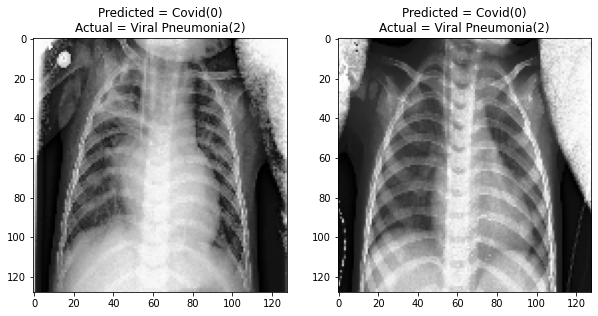

In [ ]:
misclass_df1 = print_visualize_misclassifications(model1,X_test_blurred,y_test_blurred)

### **Print Performance Metrics.**

In [ ]:
evaluate_and_store_perf_metrics(model1,'Model1','Basic Model',X_train_blurred,y_train_blurred,X_val_blurred,y_val_blurred,X_test_blurred,y_test_blurred)


<BR><center> <strong><font color="blue"><----------------------------------Model Evaluation Train/Test/Validation Scores-------------------------------------></font></strong></center><BR>

,Classifier Mdl Name,Trn Accuracy,Tst Accuracy,Val Accuracy,Trn Precision,Tst Precision,Val Precision,Trn Recall,Tst Recall,Val Recall,Mdl Config
0,Model1,0.996016,0.878788,0.787879,0.996016,0.878788,0.787879,0.996016,0.878788,0.787879,"{'name': 'sequential', 'layers': [{'class_name..."


### **Model1 Observations:**

* Performance metrics show all training metrics Accuracy/Precision/Recall close to 1.0 and validation and test metrics are at 0.8 and 0.9 approximately.
* Overfitting in training.
* 7 misclassifications in validation where COVID19 was predicted and the actual diagnosis was either Normal or Viral Pneumonia.
* Test had 4 misclassifications in total where COVID19 was predicted but the diagnosis was either Normal or Viral Pneumonia.
* Let us build another model with more Conv/Dense layers with Dropout.

## **Model2 - Model with more layers and Dropout.**

* 5 Conv/MaxPool/Dropout layers with different filter and kernel sizes.
* Maxpool layer has strides and dropout layers are added to model1.
* 2 dense layers with 1024 and 12 (output layer) neurons.

### **Build and Train Model.**

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc = ModelCheckpoint('model2_best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model2 = Sequential()
# Conv/Maxpool/Dropout.
model2.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,3)))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))

# Conv/Maxpool/Dropout.
model2.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model2.add(Dropout(0.25))

# Conv/Maxpool/Dropout.
model2.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model2.add(Dropout(0.3))

# Conv/Maxpool/Dropout.
model2.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model2.add(Dropout(0.3))

# Conv/Maxpool/Dropout.
model2.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model2.add(Dropout(0.3))

# Flattening.
model2.add(Flatten())

# Dense/Dropot.
model2.add(Dense(1024, activation = "relu"))
model2.add(Dropout(0.5))

# Output layer.
model2.add(Dense(3, activation = "softmax"))

# Optimizer.
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
# Compile the model.
model2.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy","Recall","Precision"])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 64)      4864      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 128)      

In [ ]:
#Train the model
history2=model2.fit(X_train_blurred, 
          y_train_blurred,  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=50, #number of iterations over the entire dataset to train on
          batch_size=64,validation_data = (X_val_blurred,y_val_blurred),callbacks=[es, mc],use_multiprocessing=True)#number of samples per gradient update for training

Epoch 1/50
4/4 [==============================] - 21s 5s/step - loss: 1.6587 - accuracy: 0.3705 - recall: 0.1594 - precision: 0.4878 - val_loss: 4.1207 - val_accuracy: 0.3636 - val_recall: 0.3636 - val_precision: 0.3636

Epoch 00001: val_accuracy improved from -inf to 0.36364, saving model to model2_best_model.h5
Epoch 2/50
4/4 [==============================] - 19s 5s/step - loss: 1.1190 - accuracy: 0.3546 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.5186 - val_accuracy: 0.3636 - val_recall: 0.3636 - val_precision: 0.3636

Epoch 00002: val_accuracy did not improve from 0.36364
Epoch 3/50
4/4 [==============================] - 19s 5s/step - loss: 1.0928 - accuracy: 0.4661 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.3698 - val_accuracy: 0.3030 - val_recall: 0.2727 - val_precision: 0.2812

Epoch 00003: val_accuracy did not improve from 0.36364
Epoch 4/50
4/4 [==============================] - 19s 5s/step - loss: 1.0821 - accuracy: 0.4422 - recall: 0.0000e+00 

### **Plot Train/Validation Metrics**

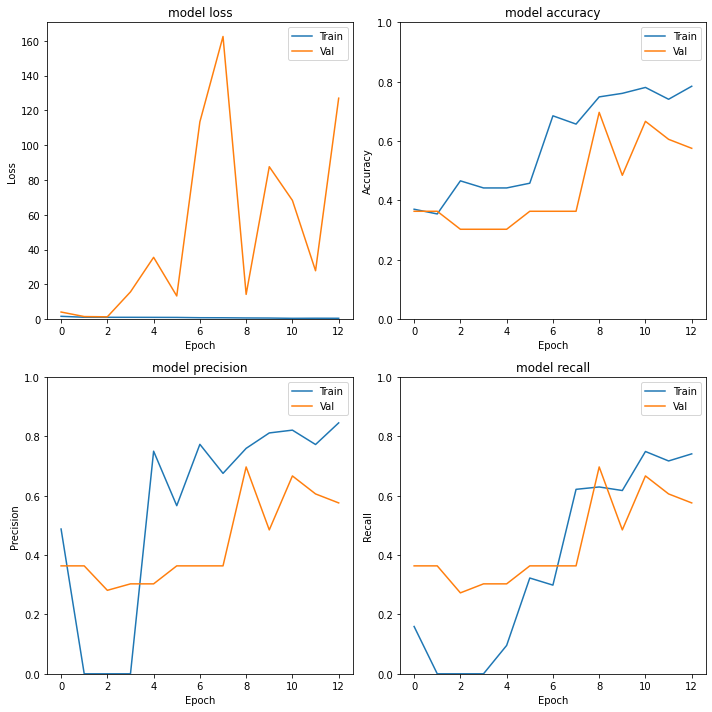

In [ ]:
plot_metrics(history2)

### **Plot Confusion Matrix**


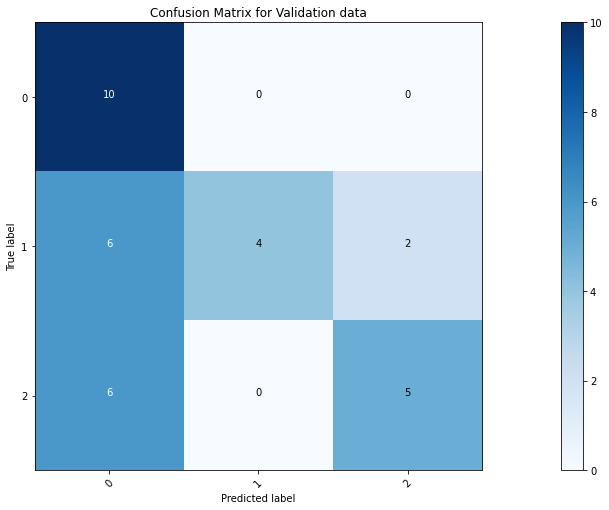

In [ ]:
print_confusion_matrix(model2,X_val_blurred,y_val_blurred,"Confusion Matrix for Validation data")

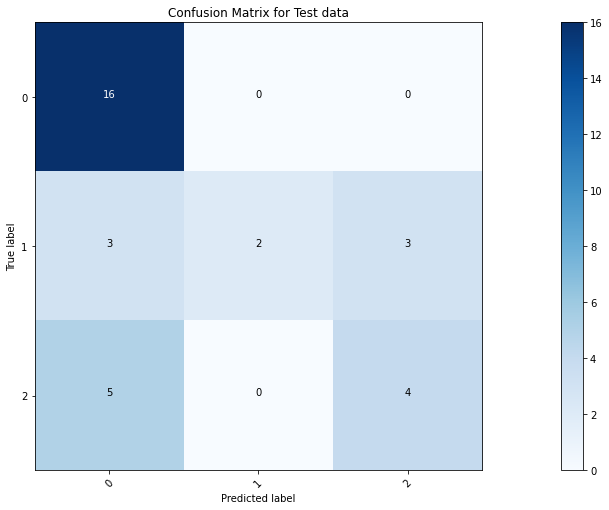

In [ ]:
print_confusion_matrix(model2,X_test_blurred,y_test_blurred,'Confusion Matrix for Test data')

### **Print and Visualize Misclassifications.**

<BR><center> <strong><font color="blue"><----------------------------------Model Misclassifications-------------------------------------></font></strong></center><BR>

<font color="orange">Total Number of misclassifications with this model = 11 . Following are some samples...</font>

,RowNo,Predicted Diagnosis (Label),Actual Diagnosis (Label)
0,0,Viral Pneumonia(2),Normal(1)
1,4,Covid(0),Viral Pneumonia(2)
2,7,Covid(0),Normal(1)
3,9,Covid(0),Viral Pneumonia(2)
4,11,Covid(0),Viral Pneumonia(2)
5,16,Viral Pneumonia(2),Normal(1)
6,19,Covid(0),Normal(1)
7,21,Viral Pneumonia(2),Normal(1)
8,24,Covid(0),Normal(1)
9,29,Covid(0),Viral Pneumonia(2)


<BR>

<center> <strong><font color="green"><-------------Model Misclassification Samples-------------></font></strong></center>

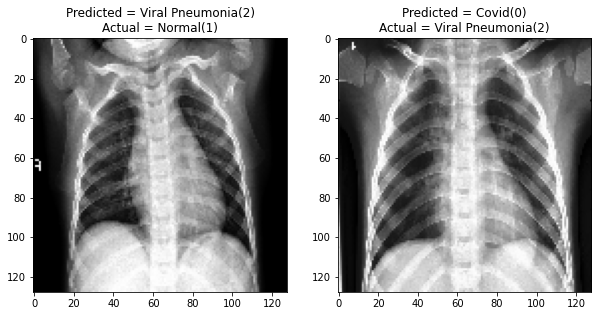

In [ ]:
misclass_df2 = print_visualize_misclassifications(model2,X_test_blurred,y_test_blurred)

### **Print Performance Metrics.**

In [ ]:
evaluate_and_store_perf_metrics(model2,'Model2','Model with dropout and maxpool',X_train_blurred,y_train_blurred,X_val_blurred,y_val_blurred,X_test_blurred,y_test_blurred)

<BR><center> <strong><font color="blue"><----------------------------------Model Evaluation Train/Test/Validation Scores-------------------------------------></font></strong></center><BR>

,Classifier Mdl Name,Trn Accuracy,Tst Accuracy,Val Accuracy,Trn Precision,Tst Precision,Val Precision,Trn Recall,Tst Recall,Val Recall,Mdl Config
0,Model1,0.996016,0.878788,0.787879,0.996016,0.878788,0.787879,0.996016,0.878788,0.787879,"{'name': 'sequential', 'layers': [{'class_name..."
1,Model2,0.741036,0.666667,0.575758,0.629482,0.666667,0.575758,0.818653,0.666667,0.575758,"{'name': 'sequential_1', 'layers': [{'class_na..."


### **Model2 Observations:**

* Adding Dropout layer did not improve the results from model1.
* Training accuracy (0.74), validation accuracy (0.7), and test accuracy (0.7).
* The performance is worse in model2 with more misclassifications - 14 in validation and 11 in test.
* In addition to the kinds of misclassifications present in Model1, Model2 had some where Viral Pneumonia was predicted but the diagnosis was actually Normal.
* Let us build another model with Dropout, DataAugumentaion,LRReduction Callbacks to address the overfitting,


## **Model3 - Model with Dropout,DataAugumentaion, LRReduction Callbacks to address the overfitting.**

* 5 Conv/MaxPool/Dropout layers with different filter and kernel sizes similar like model2.
* Maxpool layer has strides and dropout layers are added to model1 similar to Model2.
* 2 dense layers with 1024 and 12 (output layer) neurons just like Model2
Filter, Kernal sizes are fine tuned similar to model2.

### **Build and Train Model.**

In [ ]:
# Data Augumentation.

datagen = ImageDataGenerator(
        featurewise_center=False,  # Set input mean to 0 over the dataset.
        samplewise_center=False,  # Set each sample mean to 0.
        featurewise_std_normalization=False,  # Divide inputs by std of the dataset.
        samplewise_std_normalization=False,  # Divide each input by its std.
        zca_whitening=False,  # Apply ZCA whitening.
        rotation_range=10,  # Randomly rotate images in the range (degrees, 0 to 180).
        zoom_range = 0.1, # Randomly zoom image. 
        width_shift_range=0.1,  # Randomly shift images horizontally (fraction of total width).
        height_shift_range=0.1,  # Randomly shift images vertically (fraction of total height).
        horizontal_flip=False,  # Randomly flip images.
        vertical_flip=False)  # Randomly flip images.

datagen.fit(X_train_blurred)


In [ ]:
# Learning rate reduction callback.

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)



In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8)
batch_size = 38
mc = ModelCheckpoint('model3_best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model3 = Sequential()

#Conv/Maxpool/Dropout
model3.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,3)))
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(Dropout(0.25))

#Conv/Maxpool/Dropout
model3.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model3.add(Dropout(0.25))

#Conv/Maxpool/Dropout
model3.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model3.add(Dropout(0.3))

#Conv/Maxpool/Dropout
model3.add(Conv2D(filters = 128, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model3.add(Dropout(0.3))

#Conv/Maxpool/Dropout
model3.add(Conv2D(filters = 256, kernel_size = (2,2),padding = 'Same', 
                 activation ='relu'))
model3.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model3.add(Dropout(0.3))

#Flattening 
model3.add(Flatten())

#Dense/Dropout
model3.add(Dense(1024, activation = "relu"))
model3.add(Dropout(0.5))

#output layer
model3.add(Dense(3, activation = "softmax"))

#Optimizer
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

#Compile the model
model3.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy","Recall","Precision"])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 128, 128, 64)      4864      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 128)      

In [ ]:
# Train the model.

history3 = model3.fit(datagen.flow(X_train_blurred,y_train_blurred, batch_size=batch_size),
                              epochs = 50, validation_data = (X_val_blurred,y_val_blurred),
                              verbose = 2, steps_per_epoch=X_train_blurred.shape[0] // batch_size
                              , callbacks=[mc,es,learning_rate_reduction])

Epoch 1/50
6/6 - 19s - loss: 1.2818 - accuracy: 0.3146 - recall: 0.1080 - precision: 0.4340 - val_loss: 2.7898 - val_accuracy: 0.3636 - val_recall: 0.3636 - val_precision: 0.3636

Epoch 00001: val_accuracy improved from -inf to 0.36364, saving model to model3_best_model.h5
Epoch 2/50
6/6 - 17s - loss: 1.0985 - accuracy: 0.3286 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 1.5315 - val_accuracy: 0.3333 - val_recall: 0.3333 - val_precision: 0.3333

Epoch 00002: val_accuracy did not improve from 0.36364
Epoch 3/50
6/6 - 17s - loss: 1.0806 - accuracy: 0.4601 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 32.2196 - val_accuracy: 0.3030 - val_recall: 0.3030 - val_precision: 0.3030

Epoch 00003: val_accuracy did not improve from 0.36364
Epoch 4/50
6/6 - 17s - loss: 1.0361 - accuracy: 0.4366 - recall: 0.1127 - precision: 0.7500 - val_loss: 76.0736 - val_accuracy: 0.3030 - val_recall: 0.3030 - val_precision: 0.3030

Epoch 00004: val_accuracy did not improve from 0.36364

Ep

### **Plot Train/Validation Metrics.**

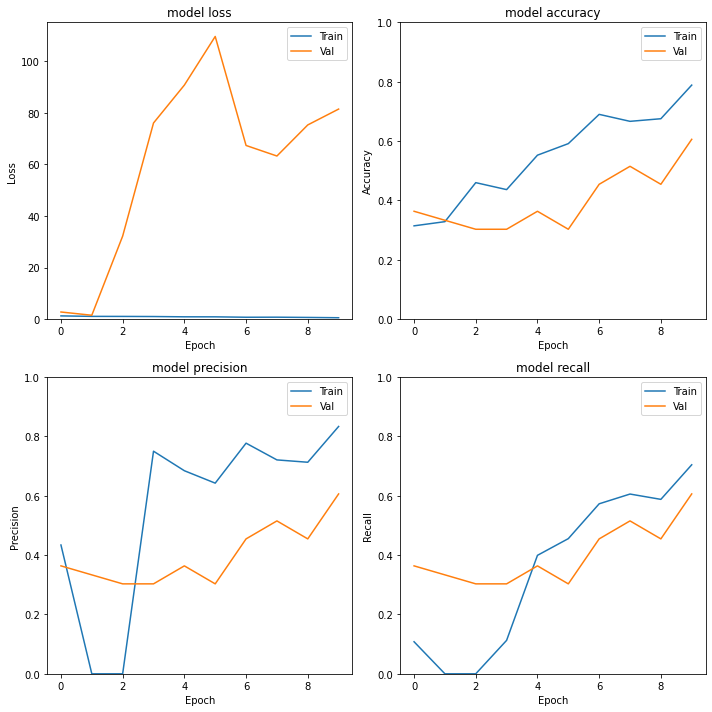

In [ ]:
plot_metrics(history3)

### **Plot Confusion Matrix.**

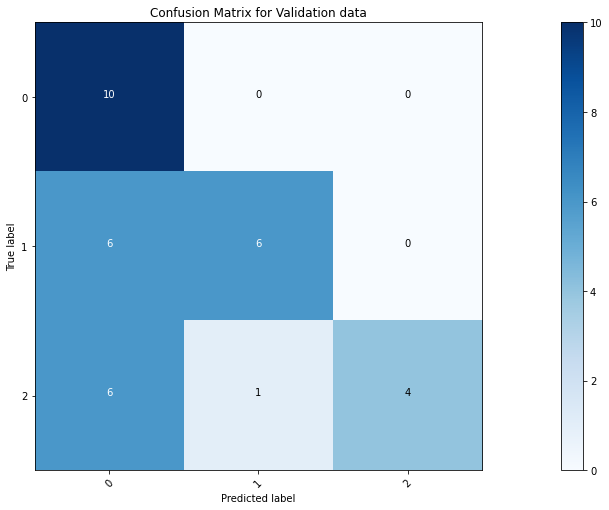

In [ ]:
print_confusion_matrix(model3,X_val_blurred,y_val_blurred,"Confusion Matrix for Validation data")

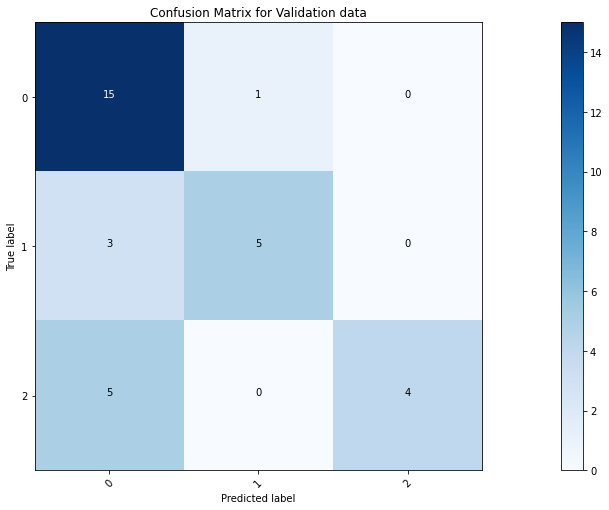

In [ ]:
print_confusion_matrix(model3,X_test_blurred,y_test_blurred,"Confusion Matrix for Validation data")

### **Print and Visualize Misclassifications.**

<BR><center> <strong><font color="blue"><----------------------------------Model Misclassifications-------------------------------------></font></strong></center><BR>

<font color="orange">Total Number of misclassifications with this model = 9 . Following are some samples...</font>

,RowNo,Predicted Diagnosis (Label),Actual Diagnosis (Label)
0,0,Covid(0),Normal(1)
1,4,Covid(0),Viral Pneumonia(2)
2,9,Covid(0),Viral Pneumonia(2)
3,11,Covid(0),Viral Pneumonia(2)
4,12,Normal(1),Covid(0)
5,16,Covid(0),Normal(1)
6,24,Covid(0),Normal(1)
7,29,Covid(0),Viral Pneumonia(2)
8,31,Covid(0),Viral Pneumonia(2)


<BR>

<center> <strong><font color="green"><-------------Model Misclassification Samples-------------></font></strong></center>

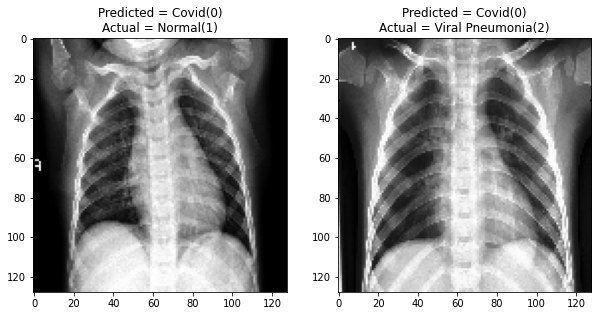

In [ ]:
misclass_df = print_visualize_misclassifications(model3,X_test_blurred,y_test_blurred)

### **Print Performance Metrics.**

In [ ]:
evaluate_and_store_perf_metrics(model3,"Model3","Model with Data Augumentation and LR Plataeu",X_train_blurred,y_train_blurred,X_val_blurred,y_val_blurred,X_test_blurred,y_test_blurred)

<BR><center> <strong><font color="blue"><----------------------------------Model Evaluation Train/Test/Validation Scores-------------------------------------></font></strong></center><BR>

,Classifier Mdl Name,Trn Accuracy,Tst Accuracy,Val Accuracy,Trn Precision,Tst Precision,Val Precision,Trn Recall,Tst Recall,Val Recall,Mdl Config
0,Model1,0.996016,0.878788,0.787879,0.996016,0.878788,0.787879,0.996016,0.878788,0.787879,"{'name': 'sequential', 'layers': [{'class_name..."
1,Model2,0.741036,0.666667,0.575758,0.629482,0.666667,0.575758,0.818653,0.666667,0.575758,"{'name': 'sequential_1', 'layers': [{'class_na..."
2,Model3,0.733068,0.727273,0.606061,0.442231,0.727273,0.606061,0.810219,0.727273,0.606061,"{'name': 'sequential_2', 'layers': [{'class_na..."


### **Model3 Observations:**

* With this third model after using Dropout, DataAugumentaion,  LRReduction Callbacks the performance is marginally better than Model2 but nowhere near that of Model1.
* 12 misclassifications in validation where COVID19 was predicted and the actual diagnosis was either Normal or Viral Pneumonia. 1 additional misclassification where the predicted diagnosis is Normal but the actual is Viral Pneumonia. 
* Test had 8 misclassifications in total where COVID19 was predicted but the diagnosis was either Normal or Viral Pneumonia. 1 additional misclassisfication where the predicted diagnosis is Normal but the actual is COVID19.
* Let us build another model with more Conv/Dense layers with Dropout.

## **Model4 - Basic Model (Original Dataset - No Gaussian Blurring et al.).**

* 3 Conv/Maxpool layers with 16,32,64 filters and 5x5, 3x3 and 3x3 kernel sizes.
* 3 dense layers with 512 and 3 (output layer) neurons.

### **Build and Train the Model.**


In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('model4_best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
model4 = Sequential()
# Conv/Maxpool.
model4.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (128,128,3)))
model4.add(MaxPool2D(pool_size=(2,2)))
# Conv/Maxpool.
model4.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model4.add(MaxPool2D(pool_size=(2,2)))
# Conv/Maxpool.
model4.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model4.add(MaxPool2D(pool_size=(2,2)))
# Flattening.
model4.add(Flatten())
# Dense layer.
model4.add(Dense(512, activation = "relu"))

model4.add(Dense(3, activation = "softmax"))
# Compile the model.
model4.compile(optimizer = "rmsprop" , loss = "categorical_crossentropy", metrics=["accuracy","Recall","Precision"])
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 128, 128, 16)      1216      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 16384)            

In [ ]:
# Train the model.

history4=model4.fit(X_train_original, 
          y_train_original,  # It expects integers due to the sparse_categorical_crossentropy loss function.
          epochs=50, # Number of iterations over the entire dataset to train on.
          batch_size=64,validation_data = (X_val_original,y_val_original),callbacks=[es, mc],use_multiprocessing=True) # Number of samples per gradient update for training.

Epoch 1/50
4/4 [==============================] - 6s 1s/step - loss: 3.1935 - accuracy: 0.4024 - recall: 0.2829 - precision: 0.3966 - val_loss: 137.3161 - val_accuracy: 0.3636 - val_recall: 0.3636 - val_precision: 0.3636

Epoch 00001: val_accuracy improved from -inf to 0.36364, saving model to model4_best_model.h5
Epoch 2/50
4/4 [==============================] - 5s 1s/step - loss: 0.9756 - accuracy: 0.5378 - recall: 0.1673 - precision: 0.6667 - val_loss: 8.6354 - val_accuracy: 0.8182 - val_recall: 0.8182 - val_precision: 0.8182

Epoch 00002: val_accuracy improved from 0.36364 to 0.81818, saving model to model4_best_model.h5
Epoch 3/50
4/4 [==============================] - 5s 1s/step - loss: 0.5939 - accuracy: 0.7928 - recall: 0.6653 - precision: 0.8698 - val_loss: 32.4208 - val_accuracy: 0.6667 - val_recall: 0.6667 - val_precision: 0.6667

Epoch 00003: val_accuracy did not improve from 0.81818
Epoch 4/50
4/4 [==============================] - 5s 1s/step - loss: 0.3667 - accuracy: 0.8

### **Plot Train/Validation Metrics.**

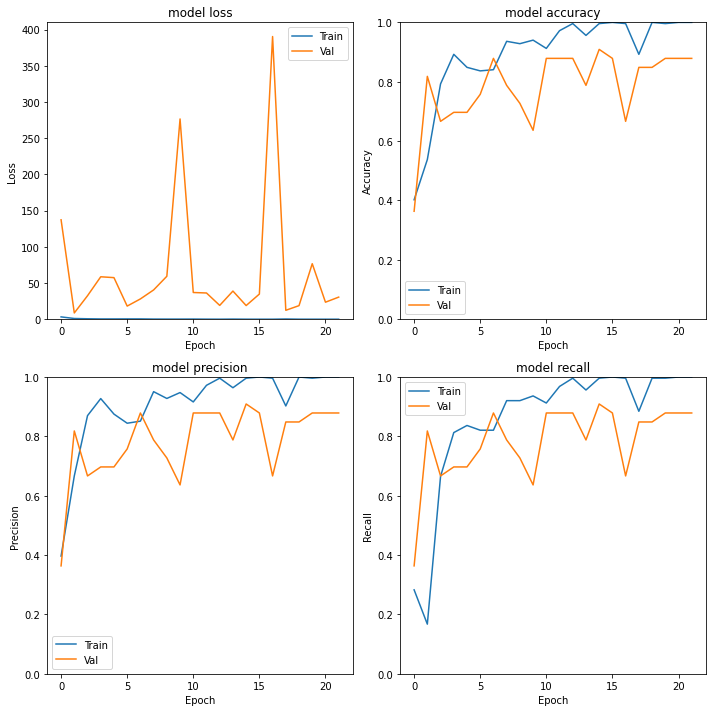

In [ ]:
plot_metrics(history4)

### **Plot Confusion Matrix.**

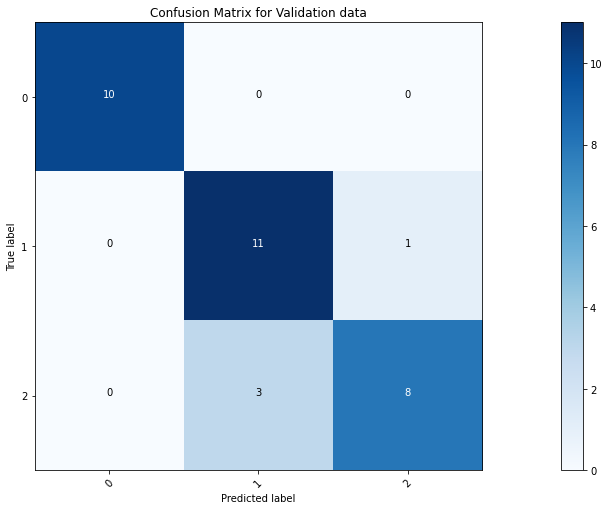

In [ ]:
print_confusion_matrix(model4,X_val_original,y_val_original,"Confusion Matrix for Validation data")

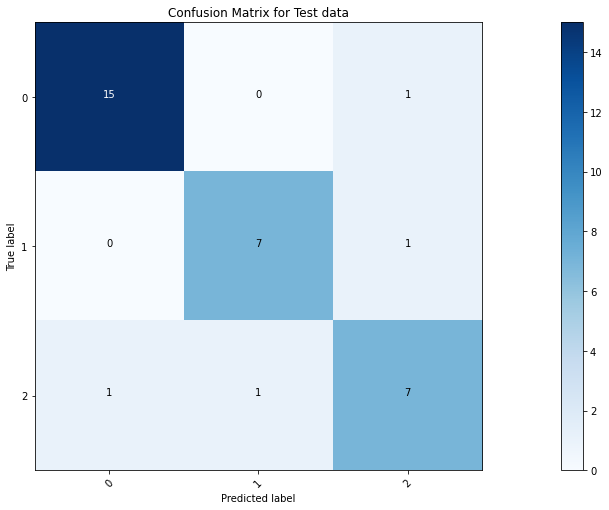

In [ ]:
print_confusion_matrix(model4,X_test_original,y_test_original,'Confusion Matrix for Test data')

### **Print and Visualize Misclassifications.**

<BR><center> <strong><font color="blue"><----------------------------------Model Misclassifications-------------------------------------></font></strong></center><BR>

<font color="orange">Total Number of misclassifications with this model = 4 . Following are some samples...</font>

,RowNo,Predicted Diagnosis (Label),Actual Diagnosis (Label)
0,3,Viral Pneumonia(2),Covid(0)
1,4,Covid(0),Viral Pneumonia(2)
2,24,Viral Pneumonia(2),Normal(1)
3,29,Normal(1),Viral Pneumonia(2)


<BR>

<center> <strong><font color="green"><-------------Model Misclassification Samples-------------></font></strong></center>

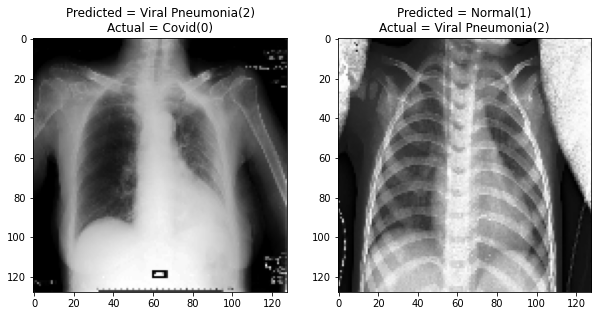

In [ ]:
misclass_df4 = print_visualize_misclassifications(model4,X_test_original,y_test_original)

### **Print Performance Metrics.**

In [ ]:
evaluate_and_store_perf_metrics(model4,'Model4','Basic Model (Original Dataset - No Gaussian Blurring et al.)',X_train_original,y_train_original,X_val_original,y_val_original,X_test_original,y_test_original)

<BR><center> <strong><font color="blue"><----------------------------------Model Evaluation Train/Test/Validation Scores-------------------------------------></font></strong></center><BR>

,Classifier Mdl Name,Trn Accuracy,Tst Accuracy,Val Accuracy,Trn Precision,Tst Precision,Val Precision,Trn Recall,Tst Recall,Val Recall,Mdl Config
0,Model1,0.996016,0.878788,0.787879,0.996016,0.878788,0.787879,0.996016,0.878788,0.787879,"{'name': 'sequential', 'layers': [{'class_name..."
1,Model2,0.741036,0.666667,0.575758,0.629482,0.666667,0.575758,0.818653,0.666667,0.575758,"{'name': 'sequential_1', 'layers': [{'class_na..."
2,Model3,0.733068,0.727273,0.606061,0.442231,0.727273,0.606061,0.810219,0.727273,0.606061,"{'name': 'sequential_2', 'layers': [{'class_na..."
3,Model4,1.000000,0.878788,0.878788,1.000000,0.878788,0.878788,1.000000,0.878788,0.878788,"{'name': 'sequential_3', 'layers': [{'class_na..."


### **Model4 Observations.**

* Performance metrics show a virtually identical performance to Model1 perhaps indicating that the Gaussian Blurring filter performed in Model1 did not add much to the accuracy of the model.
* Overfitting in training.
* 3 misclassifications in validation where Normal was predicted and the actual diagnosis was Viral Pneumonia.
* Test had 4 misclassifications in total where COVID19 was predicted but the diagnosis Viral Pneumonia; Normal was predicted but the diagnosis was Viral Pneumonia; Viral Pneumonia was predicted but the actual was Normal; and Viral Pneumonia was predicted but the actual was COVID19.
* It appears that the Gaussian Blurring filter in Model1 reduced the variety of the types of misclassifications overall. This is a good thing for medical diagnosis accuracy.


## **Visualize Predictions.**

* All above three models are saved with best params.
* Visualize predictions by loading above saved and pretrained models.

In [ ]:
pwd

'/content'

In [ ]:
ls

drive/                model3_best_model.h5  testimage.npy   trainLabels.csv
model1_best_model.h5  model4_best_model.h5  testLabels.csv
model2_best_model.h5  sample_data/          trainimage.npy


### **Visualize predictions for x_test[2], x_test[3], x_test[8], x_test[13], x_test[25].**

In [ ]:
def test_model_blurred(pretrained_model,X_val_value,y_val_value):
  y_actual=np.argmax(y_test_blurred[0])
  test_image = np.expand_dims(X_val_value, axis = 0)
  Y_pred=pretrained_model.predict(test_image)
  y_pred = np.argmax(Y_pred, axis=1)
  actual_str="The actual class = "+str(y_actual)+" and Class Label = "+enc.classes_[y_actual]
  pred_str=  "The predicted class = "+str(y_pred[0])+" and Class Label = "+enc.classes_[y_pred][0]
  if(y_actual == y_pred ):
    display (Markdown('<font color="green">'+actual_str+'</font>'))
    display (Markdown('<font color="green">'+pred_str+'</font>'))
  else:
    display (Markdown('<font color="red">'+actual_str+'</font>'))
    display (Markdown('<font color="red">'+pred_str+'</font>'))

## **Model1 - Basic Model (With Gaussian Blur).**

In [ ]:
pretrained_model1 = load_model('./model1_best_model.h5')

In [ ]:
test_model_blurred(pretrained_model1,X_test_blurred[2],y_test_blurred[2])

<font color="red">The actual class = 1 and Class Label = Normal</font>

<font color="red">The predicted class = 0 and Class Label = Covid</font>

In [ ]:
test_model_blurred(pretrained_model1,X_test_blurred[3],y_test_blurred[3])

<font color="red">The actual class = 1 and Class Label = Normal</font>

<font color="red">The predicted class = 0 and Class Label = Covid</font>

In [ ]:
test_model_blurred(pretrained_model1,X_test_blurred[8],y_test_blurred[8])

<font color="green">The actual class = 1 and Class Label = Normal</font>

<font color="green">The predicted class = 1 and Class Label = Normal</font>

In [ ]:
test_model_blurred(pretrained_model1,X_test_blurred[13],y_test_blurred[13])

<font color="red">The actual class = 1 and Class Label = Normal</font>

<font color="red">The predicted class = 0 and Class Label = Covid</font>

In [ ]:
test_model_blurred(pretrained_model1,X_test_blurred[25],y_test_blurred[25])

<font color="red">The actual class = 1 and Class Label = Normal</font>

<font color="red">The predicted class = 2 and Class Label = Viral Pneumonia</font>

## **Model2 - Model with more layers and Dropout.**

In [ ]:
pretrained_model2 = load_model('./model2_best_model.h5')

In [ ]:
test_model_blurred(pretrained_model2,X_test_blurred[2],y_test_blurred[2])

<font color="red">The actual class = 1 and Class Label = Normal</font>

<font color="red">The predicted class = 0 and Class Label = Covid</font>

In [ ]:
test_model_blurred(pretrained_model2,X_test_blurred[3],y_test_blurred[3])

<font color="red">The actual class = 1 and Class Label = Normal</font>

<font color="red">The predicted class = 2 and Class Label = Viral Pneumonia</font>

In [ ]:
test_model_blurred(pretrained_model2,X_test_blurred[8],y_test_blurred[8])

<font color="green">The actual class = 1 and Class Label = Normal</font>

<font color="green">The predicted class = 1 and Class Label = Normal</font>

In [ ]:
test_model_blurred(pretrained_model2,X_test_blurred[13],y_test_blurred[13])

<font color="red">The actual class = 1 and Class Label = Normal</font>

<font color="red">The predicted class = 0 and Class Label = Covid</font>

In [ ]:
test_model_blurred(pretrained_model2,X_test_blurred[25],y_test_blurred[25])

<font color="red">The actual class = 1 and Class Label = Normal</font>

<font color="red">The predicted class = 2 and Class Label = Viral Pneumonia</font>

## **Model3 - Model with Dropout, DataAugumentation, LRReduction Callbacks to address the overfitting.**

In [ ]:
pretrained_model3 = load_model('./model3_best_model.h5')

In [ ]:
test_model_blurred(pretrained_model3,X_test_blurred[2],y_test_blurred[2])

<font color="red">The actual class = 1 and Class Label = Normal</font>

<font color="red">The predicted class = 0 and Class Label = Covid</font>

In [ ]:
test_model_blurred(pretrained_model3,X_test_blurred[3],y_test_blurred[3])

<font color="red">The actual class = 1 and Class Label = Normal</font>

<font color="red">The predicted class = 0 and Class Label = Covid</font>

In [ ]:
test_model_blurred(pretrained_model3,X_test_blurred[8],y_test_blurred[8])

<font color="green">The actual class = 1 and Class Label = Normal</font>

<font color="green">The predicted class = 1 and Class Label = Normal</font>

In [ ]:
test_model_blurred(pretrained_model3,X_test_blurred[13],y_test_blurred[13])

<font color="red">The actual class = 1 and Class Label = Normal</font>

<font color="red">The predicted class = 0 and Class Label = Covid</font>

In [ ]:
test_model_blurred(pretrained_model3,X_test_blurred[25],y_test_blurred[25])

<font color="red">The actual class = 1 and Class Label = Normal</font>

<font color="red">The predicted class = 2 and Class Label = Viral Pneumonia</font>

In [ ]:
def test_model_original(pretrained_model,X_val_value,y_val_value):
  y_actual=np.argmax(y_test_original[0])
  test_image = np.expand_dims(X_val_value, axis = 0)
  Y_pred=pretrained_model.predict(test_image)
  y_pred = np.argmax(Y_pred, axis=1)
  actual_str="The actual class = "+str(y_actual)+" and Class Label = "+enc.classes_[y_actual]
  pred_str=  "The predicted class = "+str(y_pred[0])+" and Class Label = "+enc.classes_[y_pred][0]
  if(y_actual == y_pred ):
    display (Markdown('<font color="green">'+actual_str+'</font>'))
    display (Markdown('<font color="green">'+pred_str+'</font>'))
  else:
    display (Markdown('<font color="red">'+actual_str+'</font>'))
    display (Markdown('<font color="red">'+pred_str+'</font>'))

## **Model4 - Model with Original Dataset and No Gaussian Blurring et al..**

In [ ]:
pretrained_model4 = load_model('./model4_best_model.h5')

In [ ]:
test_model_original(pretrained_model4,X_test_original[2],y_test_original[2])

<font color="red">The actual class = 1 and Class Label = Normal</font>

<font color="red">The predicted class = 0 and Class Label = Covid</font>

In [ ]:
test_model_original(pretrained_model4,X_test_original[2],y_test_original[3])

<font color="red">The actual class = 1 and Class Label = Normal</font>

<font color="red">The predicted class = 0 and Class Label = Covid</font>

In [ ]:
test_model_original(pretrained_model4,X_test_original[2],y_test_original[8])

<font color="red">The actual class = 1 and Class Label = Normal</font>

<font color="red">The predicted class = 0 and Class Label = Covid</font>

In [ ]:
test_model_original(pretrained_model4,X_test_original[2],y_test_original[13])

<font color="red">The actual class = 1 and Class Label = Normal</font>

<font color="red">The predicted class = 0 and Class Label = Covid</font>

In [ ]:
test_model_original(pretrained_model4,X_test_original[2],y_test_original[25])

<font color="red">The actual class = 1 and Class Label = Normal</font>

<font color="red">The predicted class = 0 and Class Label = Covid</font>

**Observations:**

* Model1, Model2, and Model3 all correctly predicted X_test[8]. Predicted Normal when actual diagnosis was Normal.
* Model4 misclassified X_test[8] as COVID19 when the actual diagnosis was Normal.
* All 4 models misclassified x_test[2], x_test[3], x_test[13], and x_test[25] respectively.

## **Model Performance Evaluation.**

### **Model Performance Comparision.**

In [ ]:
model_perf_df

,Classifier Mdl Name,Trn Accuracy,Tst Accuracy,Val Accuracy,Trn Precision,Tst Precision,Val Precision,Trn Recall,Tst Recall,Val Recall,Mdl Config
0,Model1,0.996016,0.878788,0.787879,0.996016,0.878788,0.787879,0.996016,0.878788,0.787879,"{'name': 'sequential', 'layers': [{'class_name..."
1,Model2,0.741036,0.666667,0.575758,0.629482,0.666667,0.575758,0.818653,0.666667,0.575758,"{'name': 'sequential_1', 'layers': [{'class_na..."
2,Model3,0.733068,0.727273,0.606061,0.442231,0.727273,0.606061,0.810219,0.727273,0.606061,"{'name': 'sequential_2', 'layers': [{'class_na..."
3,Model4,1.000000,0.878788,0.878788,1.000000,0.878788,0.878788,1.000000,0.878788,0.878788,"{'name': 'sequential_3', 'layers': [{'class_na..."


## **Conclusion and Key Takeaways.**

* Model1 (with Gaussian Blurring et al.) and Model4 (with no filtering techniques) both had good performance metrics approximately 90% and above in all three environments - train, validation, and test.

* Model1 demonstrated less variety in misclassification errors with false positives of COVID19 when the diagnoses were actually Normal or Viral Pneumonia in 4 of the images.

* A larger dataset of images would further improve the performance of the COVID19 classification.

* Need to look at options to use pre-trained models using Transfer learning Techniques.

* The most common misclassification overall in all 4 models was falsely predicting the diagnosis as COVID19  when in fact the diagnosis was Viral Pneumonia; this was followed by erroneosly predicting COVID19 when in fact the diagnisis was Normal.

* Using Average/Mean of the images does not seem to be helpful overall although the differences in the 3 classifications does look visually distinct and striking to the human eye.

* Model1 can be fine tuned further to reduce the misclassifications.